In [18]:
# result comparison between deployments, encounters

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

In [20]:
result_path  = '/home/ys587/__Data/__whistle/__whistle_30_species/__fit_result_species/__final'

In [21]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
num_species = len(species_dict)
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

In [22]:
## result folders


In [23]:
# split_type = 'deployment'
# split_type = 'encounter'
# split_type = 'clip'

# run 0 
# split_type = 'deployment'
# target_split_folder = '20210614_202736_deployment_run0_mixup_spp'
split_type = 'deployment'
target_split_folder = '20210621_142245_deployment_run0_attention_or_spp_mixup'
# split_type = 'encounter'
# target_split_folder = '20210623_162002_encounter_run0_mixup_spp'
# split_type = 'clip'
# target_split_folder = '20210623_162213_clip_run0_mixup_spp'

# deploy_split_folder = '20210520_155025_deployment_run0_spp'
# encounter_split_folder = '20210520_104352_encounter_run0_spp'
# clip_split_folder = '20210523_204759_clip_run0_spp'

# Deployment split

              precision    recall  f1-score   support

          BD      0.114     0.117     0.115      2160
          CD      0.428     0.373     0.399      4715
         STR      0.288     0.330     0.308      2691
         SPT      0.407     0.289     0.338      2392
        SPIN      0.161     0.101     0.124      1123
         PLT      0.226     0.463     0.304      2164
          RT      0.407     0.415     0.411      1404
         FKW      0.658     0.462     0.543      3425

    accuracy                          0.342     20074
   macro avg      0.336     0.319     0.318     20074
weighted avg      0.374     0.342     0.349     20074

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[ 252  500  455  312  130  366  111   34]
 [ 410 1761  912  230   73 1072  176   81]
 [ 424  534  887  236  113  354   66   77]
 [ 376  544  401  691   92  253   18   17]
 [ 300  189  176  150  113  119   55   21]
 [ 238  281  152   55   79 1002   39  318]
 [ 124  128   53 

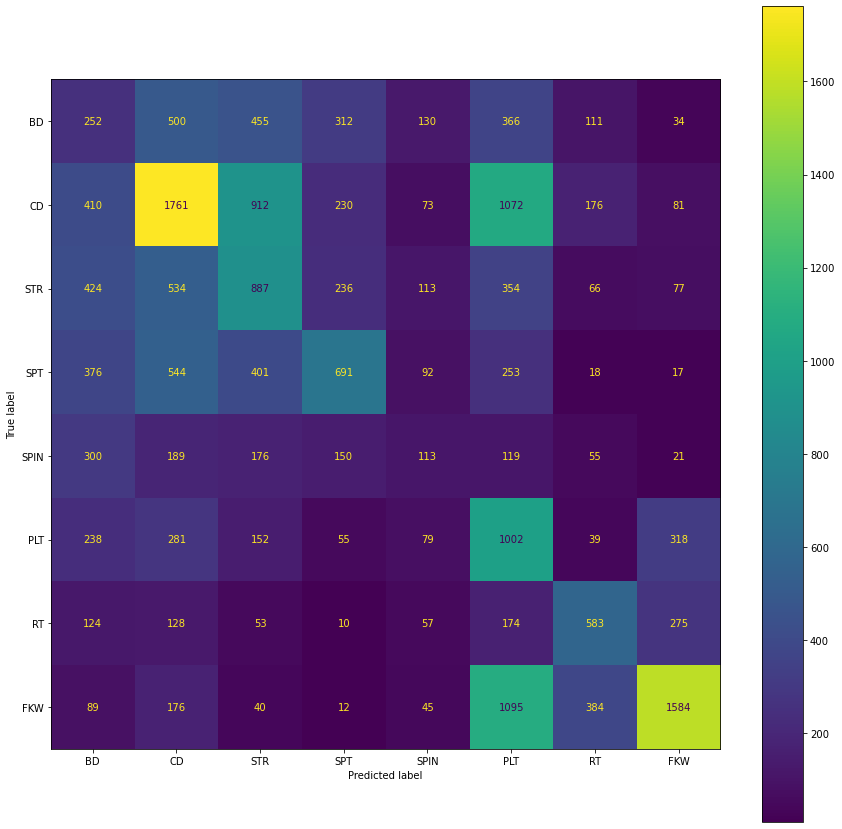

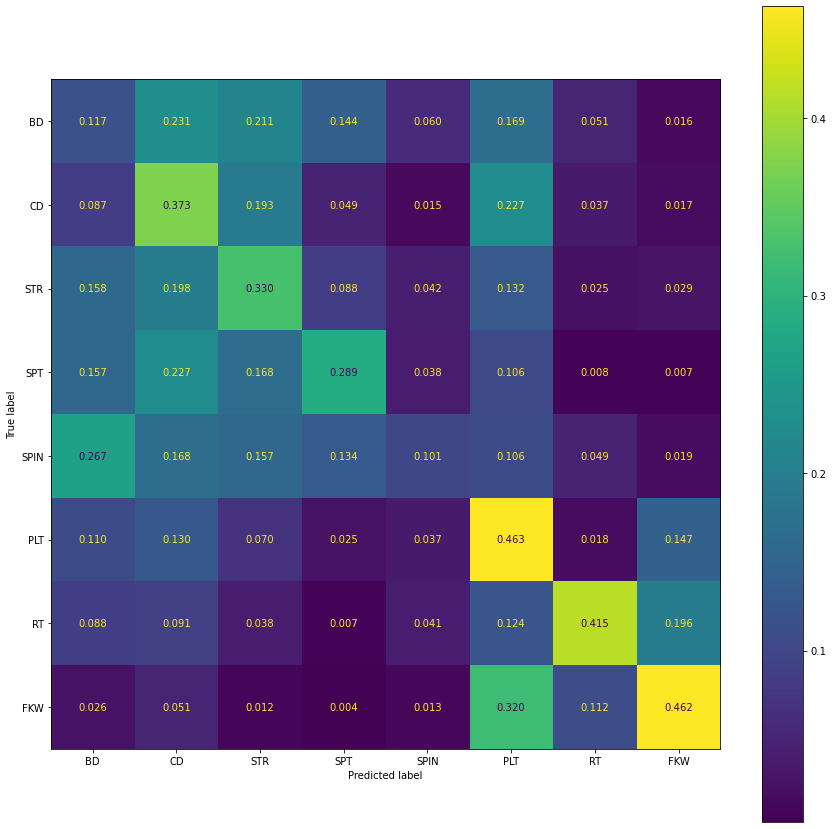

In [24]:
if split_type == 'deployment':
    # deployment: e.g. STAR2006_test_results.npz
    fold_list = ['STAR2000', 'STAR2003', 'STAR2006', 'HICEAS2002', 'PICEAS2005']

    # for ii in range(len(fold_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in fold_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None2, output_dict=False, zero_division='warn')
    np.set_printoptions(linewidth=200, precision=3, suppress=True)
    
    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
    
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)
    
    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)
    
    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)


# Enounter split

In [25]:
if split_type == 'encounter':
    # enounter: e.g. fold0_test_results.npz, 
    fold_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']
    # result_encounter = np.load(os.path.join(result_path, '20210520_104352_encounter'))

    # for ii in range(len(fold_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in fold_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

    np.set_printoptions(linewidth=200, precision=3, suppress=True)

    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
            
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)

# Clip split

In [26]:
if split_type == 'clip':
    # clip: e.g. fold0_test_results.npz, 
    fold_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']

    # for ii in range(len(fold_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in fold_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, output_dict=False, zero_division='warn')

    np.set_printoptions(linewidth=200, precision=3, suppress=True)

    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
            
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)

## Model architecture

In [ ]:
from lib_validation import find_best_model
from tensorflow.keras.models import load_model

model_folder = os.path.join(result_path, target_split_folder, fold_list[2])
the_best_model, _ = find_best_model(model_folder, purge=False)

model_curr = load_model(the_best_model)
model_curr.summary()